<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Sammy%20Lee%20-%20Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [106]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [107]:
##### Your Code Here #####

df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [108]:
# I choose 'sqft_living' as my independent variable and 'price' as my dependent variable

import numpy as np
import matplotlib.pyplot as plt

X = df['sqft_living'].values.reshape(-1, 1)
y = df['price'].values

print(X.shape)
print(y.shape)

(21613, 1)
(21613,)


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

y_pred = LinReg.predict(X_test)

print("R^2: {:.2f}".format(LinReg.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

R^2: 0.49

RMSE: 275006.59


In [110]:
print("Coefficient: {}".format(LinReg.coef_))
print()
print("Intercept: {}".format(LinReg.intercept_))

Coefficient: [268.42931803]

Intercept: -20631.156554487883


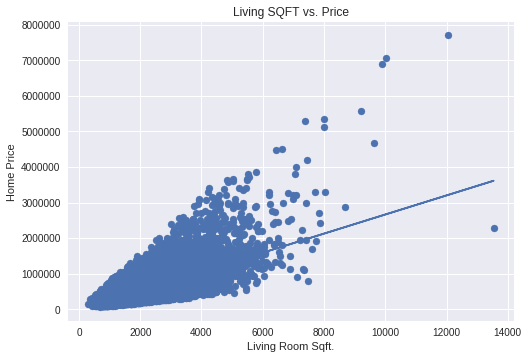

In [111]:
m_hat = LinReg.coef_
b_hat = LinReg.intercept_

# Plot the points
plt.scatter(df['sqft_living'], df['price'])

# Plot the line
y_hat = [m_hat * x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.ylabel("Home Price")
plt.xlabel("Living Room Sqft.")
plt.title("Living SQFT vs. Price")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [112]:
##### Your Code Here #####

# For my second X-variable I'm using 'grade'

X = df.loc[:, ['sqft_living', 'grade']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

LinReg_1 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg_1.predict(X_test)

print("R^2: {:.2f}".format(LinReg_1.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Coefficients:\n{}".format(LinReg_1.coef_))
print()
print("Intercept:\n{}".format(LinReg_1.intercept_))

R^2: 0.53

RMSE: 265603.00

Coefficients:
[   167.10832275 103065.16259903]

Intercept:
-599835.6618581187


IndexError: ignored

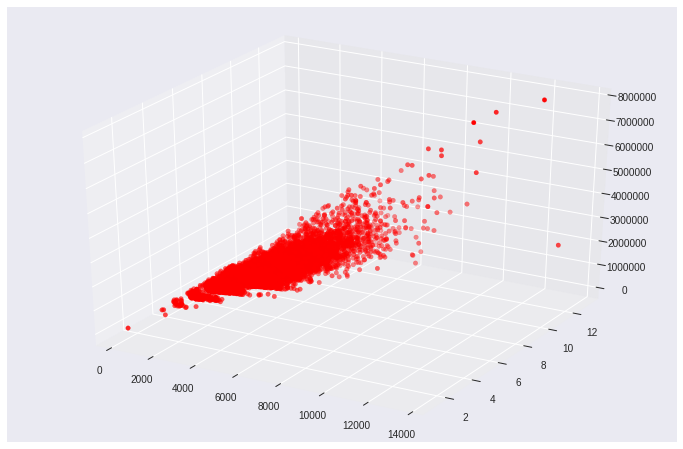

In [113]:
beta_0 = LinReg_1.intercept_
beta_i = LinReg_1.coef_

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'], c='red')


# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1, y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot a Plane
plt3d = plt.gca(projection='3d')


# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()




# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [114]:
##### Your Code Here #####

df_copy = df.drop(['price', 'date'], axis=1)
df_copy.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [115]:
X = df_copy.values
y = df['price'].values

print(X.shape)
print(y.shape)

(21613, 19)
(21613,)


In [116]:
# Ran into problems with the date column, so I ended up dropping it

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg_2 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg_2.predict(X_test)

print("R^2: {:.2f}".format(LinReg_2.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(LinReg_2.coef_))
print()
print("Multiple Regression Intercept: {}".format(LinReg_2.intercept_))




R^2: 0.70

RMSE: 210114.16

Multiple Regression Coefficients: [-1.42599448e-06 -3.39779979e+04  4.38669962e+04  1.08657672e+02
  8.99889323e-02  5.64516291e+03  5.54361251e+05  5.48026914e+04
  2.34303381e+04  9.45191100e+04  7.04485013e+01  3.82091701e+01
 -2.64650234e+03  2.23552585e+01 -5.51527403e+02  5.95882259e+05
 -1.93954302e+05  2.02328253e+01 -3.60937167e-01]

Multiple Regression Intercept: 6601458.879193457


In [117]:
df_copy_1 = df.drop(['price'], axis=1)
df_copy_1.head()
                   

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [118]:
# To deal with the date column we turn a datetime object into ordinal values

import datetime as dt


df_copy_1['date'] = pd.to_datetime(df_copy_1['date'])
df_copy_1['date']=df_copy_1['date'].map(dt.datetime.toordinal)

df_copy_1['date'].head()

0    735519
1    735576
2    735654
3    735576
4    735647
Name: date, dtype: int64

In [119]:
X = df_copy_1.values
y = df['price'].values

print(X.shape)
print(y.shape)

(21613, 20)
(21613,)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg_3 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg_3.predict(X_test)

print("R^2: {:.2f}".format(LinReg_3.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(LinReg_3.coef_))
print()
print("Multiple Regression Intercept: {}".format(LinReg_3.intercept_))

R^2: 0.71

RMSE: 209739.26

Multiple Regression Coefficients: [-1.45205088e-06  1.18445235e+02 -3.39926299e+04  4.38718660e+04
  1.08618079e+02  8.53805997e-02  6.31264149e+03  5.54477878e+05
  5.46076656e+04  2.48626424e+04  9.47843473e+04  7.02527108e+01
  3.83653683e+01 -2.63997957e+03  2.35318805e+01 -5.50432907e+02
  5.98354771e+05 -1.93117899e+05  2.04827231e+01 -3.58955073e-01]

Multiple Regression Intercept: -80662607.68430483


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


### One thing that might be of use is a Residuals Plot...shows the difference between the residuals  (prediction error) on the verical axis and the dependent variable on the horizontal axis...for detection of regions within the target variable where predictions become highly unreliable.

In [121]:
!pip install yellowbrick

## Stretch Goal: Feature Engineering

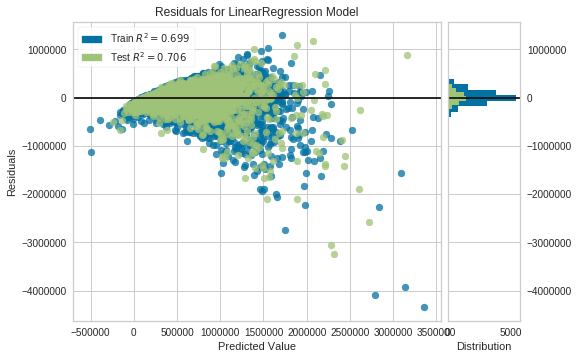

In [122]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


### If the residuals are randomly dispersed around the horizontal line, it usually means linear models may be appropriate.  Otherwise, if you see patterns such as the one above, you may have one or a combination of things like non-linearity, heteroskedasticity, or outlier problems going on.

In [123]:
df_copy_1.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


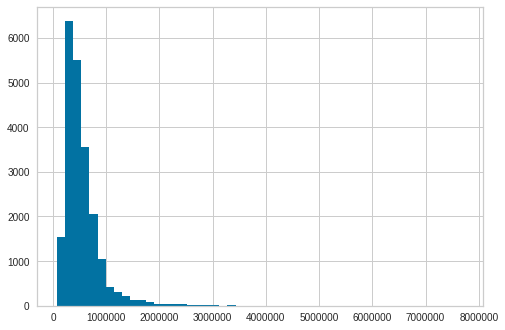

In [125]:
# Histogram of price variable shows non-normal distribution that's skewed right-ward

df['price'].hist(bins=50)

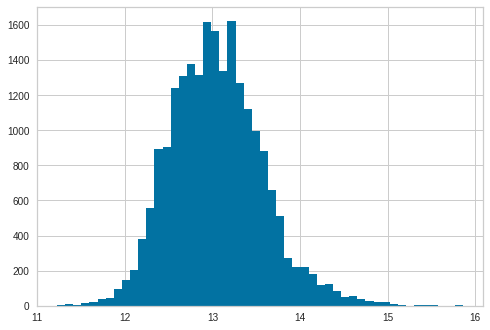

In [126]:
price_logged = np.log(df['price'])
price_logged.hist(bins=50)

In [127]:
# We're going to regressing on the log of price

X = df_copy_1.values
y = price_logged.values

print(X.shape)
print(y.shape)

(21613, 20)
(21613,)


In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg_4 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg_4.predict(X_test)

print("R^2: {:.2f}".format(LinReg_4.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(LinReg_4.coef_))
print()
print("Multiple Regression Intercept: {}".format(LinReg_4.intercept_))

R^2: 0.77

RMSE: 0.25

Multiple Regression Coefficients: [ 6.23615633e-13  2.03181014e-04 -1.14378346e-02  7.36026915e-02
  9.61675618e-05  3.87789712e-07  7.46933810e-02  3.85238901e-01
  6.22033124e-02  6.14126604e-02  1.57939260e-01  3.99410727e-05
  5.62264891e-05 -3.49353229e-03  3.83622105e-05 -6.20290161e-04
  1.40773748e+00 -1.28664512e-01  9.68305273e-05 -1.52767781e-07]

Multiple Regression Intercept: -153.50902942215873


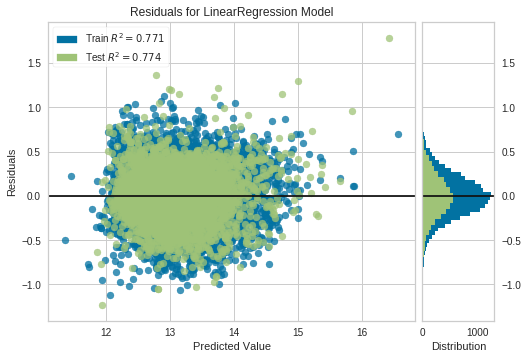

In [129]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

### This residual plot of the logged transformed model looks much more random implying that the log-transformed model may be more appropriate.

In [130]:
np.max(LinReg_4.coef_) # Lattitude was the highest coefficient

1.4077374842832129

In [142]:
# Trying out Ridge Regression

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge(alpha=0.01).fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Training Score: {:.2f}".format(ridge.score(X_train, y_train)))
print()
print("R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(ridge.coef_))
print()
print("Multiple Regression Intercept: {}".format(ridge.intercept_))

Training Score: 0.77

R^2: 0.78

RMSE: 0.25

Multiple Regression Coefficients: [ 9.03726667e-13  2.02776673e-04 -8.92351685e-03  7.02379285e-02
  9.36810430e-05  5.54515034e-07  7.65446762e-02  3.79113787e-01
  5.69370162e-02  6.53757363e-02  1.56975066e-01  3.65350826e-05
  5.57290138e-05 -3.37477944e-03  3.64988880e-05 -6.06069340e-04
  1.40494258e+00 -1.56794221e-01  1.06890969e-04 -3.18094237e-07]

Multiple Regression Intercept: -158.16269286710923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.512347e-26
  overwrite_a=True).T


In [150]:
# Trying out Ridge Regression with scaled values

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X = df_copy_1.values
y = price_logged.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

print("Training Score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print()
print("R^2: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(ridge.coef_))
print()
print("Multiple Regression Intercept: {}".format(ridge.intercept_))

Training Score: 0.77

R^2: 0.78

RMSE: 0.25

Multiple Regression Coefficients: [ 0.0025894   0.02295917 -0.00843373  0.05416689  0.063434    0.02345588
  0.04150304  0.03381859  0.04361451  0.04254831  0.1848367   0.05131697
  0.03585933 -0.09954665  0.01476965 -0.03239623  0.19494439 -0.02206356
  0.07349528 -0.00869911]

Multiple Regression Intercept: 13.050584040590124


In [152]:
# Trying out Ridge Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df_copy_1.values
y = price_logged.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("Training Score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print()
print("R^2: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print()
print("Multiple Regression Coefficients: {}".format(lr.coef_))
print()
print("Multiple Regression Intercept: {}".format(lr.intercept_))

Training Score: 0.77

R^2: 0.78

RMSE: 0.25

Multiple Regression Coefficients: [ 0.0025894   0.02295919 -0.00843375  0.05416694  0.06343394  0.02345592
  0.04150307  0.03381861  0.0436145   0.04254831  0.18483696  0.05131691
  0.03585931 -0.09954683  0.01476962 -0.03239631  0.19494448 -0.02206355
  0.07349525 -0.00869914]

Multiple Regression Intercept: 13.050584040590124
